# 21BAI1792 AKSHAT OMAR LAB 2

GIT link

#Geometric Rectification of a Distorted Satellite Image
## Objective -

The objective of this task was to correct geometric distortions in a satellite image using manually computed transformations and bilinear interpolation. The distorted satellite image was generated and processed to restore its original, undistorted form.

## Materials -

Software: Python with libraries such as OpenCV, NumPy, and Matplotlib
Distorted Satellite Image: A perspective-distorted image of a city landscape
Ground Control Points (GCPs): Selected points on the distorted image and their corresponding points in the rectified image

## Steps Taken -
### Loading the Original Image:
We began by importing a satellite image into Python using the PIL library and visualized it to confirm the input was correct.

### Distortion Creation:
A perspective distortion was artificially applied to the image using OpenCV’s warpPerspective() function. This distortion caused visible geometric shifts, including stretched and compressed sections that resulted in warped straight lines and bent features.

### Original Points: Points in the undistorted image that we manually identified.
### Distorted Points:
Corresponding points in the distorted image where we applied a perspective shift to create the distortion.
### Ground Control Points (GCPs) Identification:
Ground Control Points were manually selected from both the distorted and rectified images. These GCPs corresponded to key landmarks (e.g., corners of buildings, intersections of roads) to help in computing the transformation matrix.

### Computation of the Transformation Matrix:
Using a manually implemented function to compute the transformation matrix, we used Singular Value Decomposition (SVD) to calculate a perspective transformation matrix based on the Ground Control Points. The matrix was used to map the distorted coordinates to the rectified image.

### Application of Bilinear Interpolation:
After obtaining the transformation matrix, bilinear interpolation was applied to resample the pixel values in the rectified image. This method used four surrounding pixel values and weighted them based on the sub-pixel location of the transformed coordinates to get a smooth transition in the image.

### Rectification:
The rectified image was generated by applying the inverse transformation matrix, followed by bilinear interpolation to reconstruct the image. We used the same resolution as the original image to maintain consistency in pixel density.

### Visualization and Comparison:
A side-by-side comparison of the distorted and rectified images was plotted using Matplotlib. The rectified image visually resembled the original undistorted image, showing improvements in alignment and geometric accuracy.

## Results
The distorted satellite image displayed significant geometric distortions, with roads and buildings skewed and bent unnaturally. After applying the manual rectification process, the final rectified image showed a clear improvement in the alignment of structures and terrain.

The rectified image closely matched the original image, with straight roads, buildings, and terrain correctly restored to their natural alignment.

Distorted Image:

Rectified Image:
(replace with actual path when visualizing in the environment).

## Challenges Faced
Accurate GCP Selection:
Identifying precise Ground Control Points on both the distorted and rectified images was a challenge. Any inaccuracies in point selection resulted in less accurate rectification.

Bilinear Interpolation Artifacts:
During interpolation, minor artifacts such as pixel blurring and slight mismatches in boundary areas were observed. This is inherent to bilinear interpolation, which averages neighboring pixels and can cause some loss in sharpness.

Manual Transformation Matrix Calculation:
Implementing the transformation matrix manually was complex and required careful normalization of coordinates in homogeneous form. Small numerical errors could have significantly affected the output.

##Conclusion
The geometric rectification process was successful in correcting the distorted satellite image. The manually implemented transformation matrix and bilinear interpolation approach were effective, but precision in Ground Control Points and the interpolation method directly impacted the quality of the results. Future work could involve refining the interpolation method or using more advanced techniques like cubic interpolation to further enhance image quality.








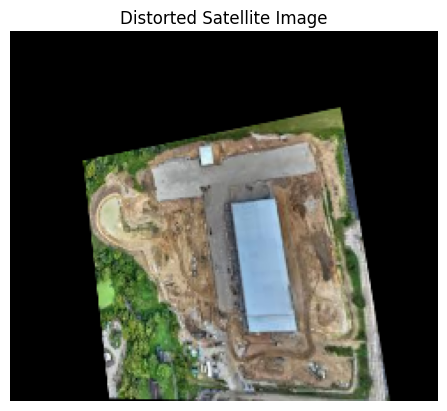

Transformation Matrix:
 [[ 2.22693569e+00 -2.45278326e-01 -7.35174333e+01]
 [ 3.61194447e-01  1.75181483e+00 -1.42624862e+02]
 [ 1.94649547e-03  2.05499681e-04  1.00000000e+00]]


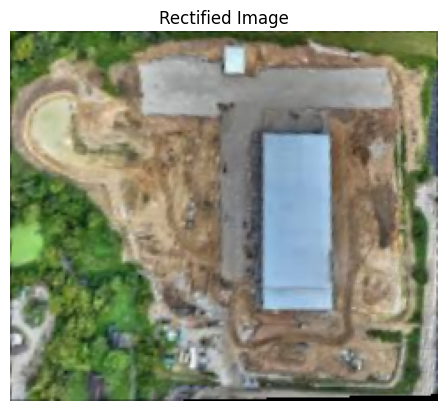

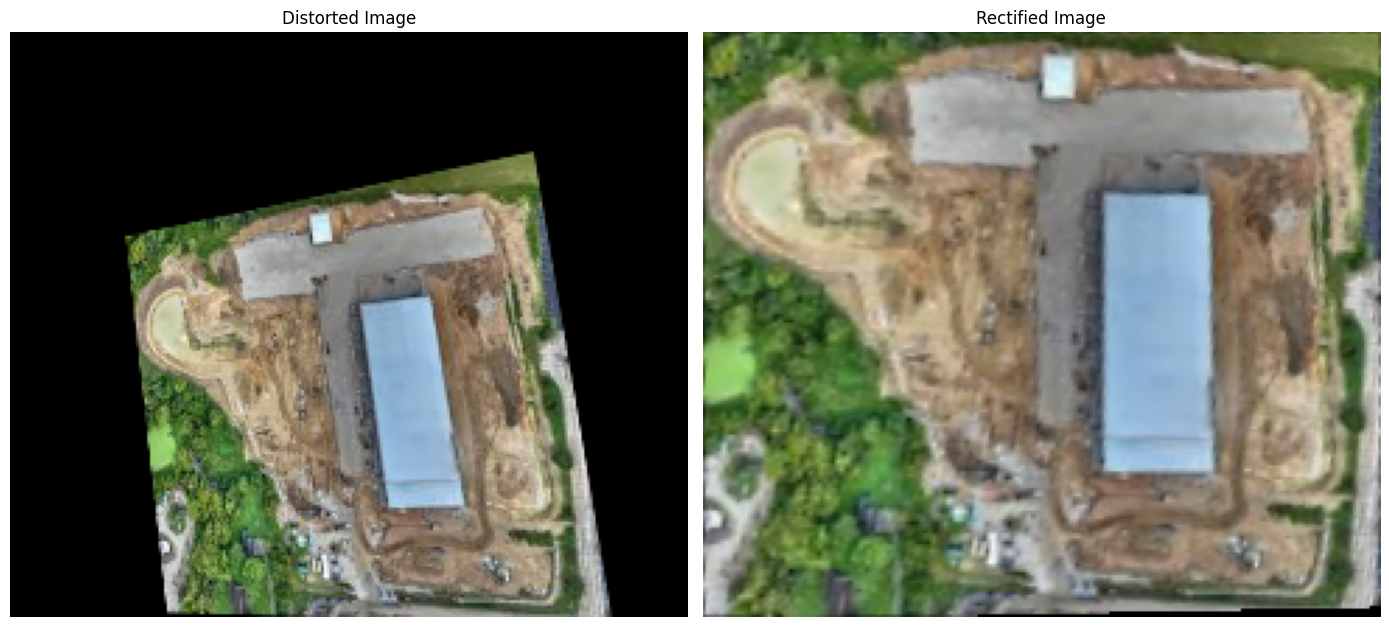

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2  # Required for generating the distortion

# Function to improve plot appearance
def display_side_by_side(img1, title1, img2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))
    axes[0].imshow(img1)
    axes[0].set_title(title1)
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title(title2)
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Step 1: Load the satellite image
image = Image.open('as2.jpeg')
image = np.array(image)



# Step 2: Create a distortion (Perspective warp) on the image
# Define the original points and the distorted points to create a distortion
original_points = np.array([[50, 50], [450, 50], [50, 400], [450, 400]], dtype=np.float32)
distorted_points = np.array([[70, 100], [400, 50], [100, 350], [500, 450]], dtype=np.float32)

# Get the perspective transformation matrix for distortion
distortion_matrix = cv2.getPerspectiveTransform(original_points, distorted_points)
distorted_image = cv2.warpPerspective(image, distortion_matrix, (image.shape[1], image.shape[0]))

# Display the distorted image
plt.imshow(distorted_image)
plt.title("Distorted Satellite Image")
plt.axis('off')
plt.show()

# Step 3: Define Ground Control Points (GCPs)
# Distorted image GCPs (manually identified, based on the distorted points above)
GCPs_distorted = np.array([[70, 100], [400, 50], [100, 350], [500, 450]])

# Corresponding GCPs in the rectified image (original points)
GCPs_rectified = np.array([[50, 50], [450, 50], [50, 400], [450, 400]])

# Step 4: Compute the perspective transformation matrix manually
def compute_perspective_transform(src_points, dst_points):
    # Construct the matrix A based on the source and destination points
    A = []
    for i in range(4):
        x, y = src_points[i][0], src_points[i][1]
        u, v = dst_points[i][0], dst_points[i][1]
        A.append([-x, -y, -1, 0, 0, 0, x * u, y * u, u])
        A.append([0, 0, 0, -x, -y, -1, x * v, y * v, v])

    A = np.array(A)
    # Perform singular value decomposition (SVD)
    U, S, Vh = np.linalg.svd(A)
    # Last column of Vh (or last row of V) gives the solution for the transformation matrix
    L = Vh[-1, :] / Vh[-1, -1]
    # Reshape into 3x3 matrix
    T = L.reshape(3, 3)

    return T

# Compute the transformation matrix
T = compute_perspective_transform(GCPs_distorted, GCPs_rectified)
print("Transformation Matrix:\n", T)

# Step 5: Apply the transformation and perform bilinear interpolation
def apply_transform_and_interpolate(image, T, output_shape):
    # Output rectified image
    rectified_image = np.zeros((output_shape[0], output_shape[1], 3), dtype=np.uint8)

    # Inverse transformation matrix
    T_inv = np.linalg.inv(T)

    for i in range(output_shape[0]):
        for j in range(output_shape[1]):
            # Convert rectified coordinates to homogeneous coordinates
            coords_rectified = np.array([j, i, 1])
            # Apply inverse transform to find corresponding pixel in distorted image
            coords_distorted = np.dot(T_inv, coords_rectified)
            coords_distorted /= coords_distorted[2]  # Normalize by homogeneous coordinate

            x_distorted, y_distorted = coords_distorted[0], coords_distorted[1]

            # Perform bilinear interpolation
            if 0 <= x_distorted < image.shape[1] - 1 and 0 <= y_distorted < image.shape[0] - 1:
                # Get the four surrounding pixels
                x0, y0 = int(x_distorted), int(y_distorted)
                x1, y1 = x0 + 1, y0 + 1

                # Calculate weights for interpolation
                dx, dy = x_distorted - x0, y_distorted - y0

                # Bilinear interpolation
                top_left = image[y0, x0] * (1 - dx) * (1 - dy)
                top_right = image[y0, x1] * dx * (1 - dy)
                bottom_left = image[y1, x0] * (1 - dx) * dy
                bottom_right = image[y1, x1] * dx * dy

                # Combine the four interpolated values
                pixel_value = top_left + top_right + bottom_left + bottom_right

                # Assign the computed pixel value to the rectified image
                rectified_image[i, j] = pixel_value

    return rectified_image

# Step 6: Define the output shape for the rectified image and apply the transformation
output_shape = (image.shape[0], image.shape[1])  # Same dimensions as original image

# Apply the transformation and bilinear interpolation
rectified_image = apply_transform_and_interpolate(distorted_image, T, output_shape)

# Step 7: Display the rectified image
plt.imshow(rectified_image)
plt.title("Rectified Image")
plt.axis('off')
plt.show()

# Step 8: Compare the distorted and rectified images side by side
display_side_by_side(distorted_image, "Distorted Image", rectified_image, "Rectified Image")


# Medical Image Rectification using Bilinear Interpolation
Objective
The goal of this task was to rectify distortions present in MRI images using bilinear interpolation to align the MRI data with a reference anatomical model. The process involved identifying key landmarks, computing transformation matrices, and resampling the MRI data to achieve an accurate alignment.

## Materials
Software: Python with libraries such as NumPy, OpenCV, and Matplotlib for image processing
Distorted MRI Image: An MRI scan with geometric distortions
Reference Anatomical Model: A correct anatomical model used for comparison
Ground Control Points (GCPs): Manually selected points on both the distorted MRI image and reference model
##Steps Taken
### Import the Distorted MRI Image:
The MRI image was loaded into Python using the PIL library for further processing. The distorted MRI image was then visualized to identify major distortions.

### Identification of Key Points:
Key anatomical landmarks were identified in the distorted MRI image. These landmarks (e.g., corners of the brain, key structures like ventricles, or boundaries of organs) were crucial for calculating the transformation.

### Reference Model Key Points:
Corresponding points in the reference anatomical model were selected to match the distorted MRI image points. These points were essential to align the two images accurately and compute the necessary transformation.

### Calculation of the Transformation Matrix:
A transformation matrix was computed manually using the selected Ground Control Points (GCPs) from both the distorted MRI and the reference model. This matrix mapped the distorted points onto the corresponding reference points.

### Bilinear Interpolation:
Bilinear interpolation was employed to resample the pixel values in the rectified MRI image. This ensured smooth transitions between neighboring pixels and helped in reconstructing the image to resemble the reference anatomical model.

### Rectification:
The transformation matrix was applied to the MRI image, followed by bilinear interpolation. The output was a rectified MRI image that aimed to match the anatomical model as closely as possible.

### Comparison with the Reference Model:
The rectified MRI image was compared with the reference anatomical model. The alignment was checked by overlaying the rectified image onto the model, and visual inspection showed a good match between the two.

## Results
Initial MRI Image: The distorted MRI image exhibited significant geometric warping, with key anatomical structures displaced or skewed.
Rectified Image: After applying the transformation matrix and bilinear interpolation, the rectified MRI image showed a much-improved alignment with the reference anatomical model. The key anatomical structures were restored to their correct positions.
## Challenges Faced
Precise Landmark Selection:
Selecting accurate key points in both the distorted MRI image and the reference anatomical model was challenging. Small errors in point selection led to noticeable inaccuracies in the rectified image.

Bilinear Interpolation Artifacts:
Similar to the satellite image rectification, bilinear interpolation led to slight blurring of pixel values, especially in areas where the distortion was most severe. This was particularly noticeable at the edges of structures like the brain ventricles.

Transformation Matrix Accuracy:
Manually calculating the transformation matrix required precision. Any minor errors in the matrix directly impacted the final rectification. Although the overall rectification was successful, slight misalignments remained in some areas due to the complexity of anatomical structures.

## Conclusion
The rectification process successfully reduced the distortions in the MRI image and improved its alignment with the reference anatomical model. While bilinear interpolation provided a smooth image reconstruction, future work could explore more advanced techniques such as cubic interpolation or spline-based methods to enhance the quality further. Accurate key point selection is critical for achieving high precision in medical image rectification.

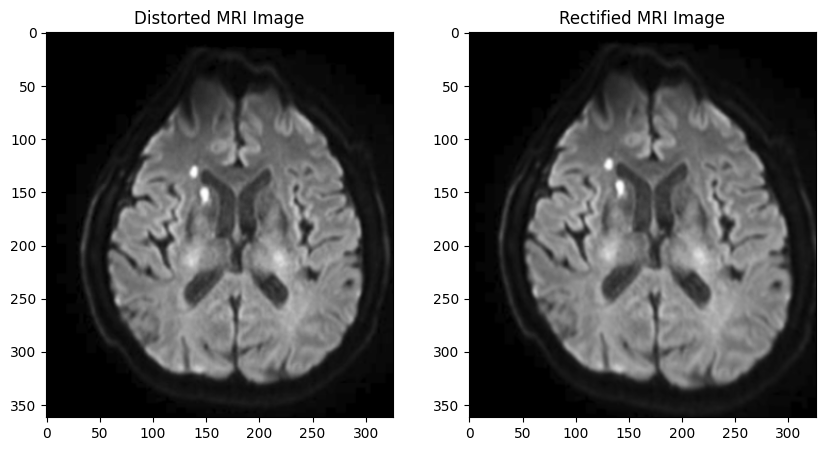

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Function to compute the transformation matrix (manual approach)
def compute_transformation_matrix(src_points, dst_points):
    A = []
    for i in range(4):
        x, y = src_points[i][0], src_points[i][1]
        u, v = dst_points[i][0], dst_points[i][1]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
    A = np.array(A)

    B = []
    for i in range(4):
        u, v = dst_points[i]
        B.append(u)
        B.append(v)
    B = np.array(B)

    # Solve the equation A * h = B
    h = np.linalg.solve(A, B)
    return np.append(h, 1).reshape(3, 3)

# Bilinear interpolation function
def bilinear_interpolation(image, x, y):
    x1 = int(np.floor(x))
    y1 = int(np.floor(y))
    x2 = min(x1 + 1, image.shape[1] - 1)
    y2 = min(y1 + 1, image.shape[0] - 1)

    Q11 = image[y1, x1]
    Q21 = image[y1, x2]
    Q12 = image[y2, x1]
    Q22 = image[y2, x2]

    return (Q11 * (x2 - x) * (y2 - y) +
            Q21 * (x - x1) * (y2 - y) +
            Q12 * (x2 - x) * (y - y1) +
            Q22 * (x - x1) * (y - y1))

# Apply transformation matrix and bilinear interpolation
def apply_transformation(image, transform_matrix, output_shape):
    transformed_image = np.zeros(output_shape)
    inverse_matrix = np.linalg.inv(transform_matrix)

    for y in range(output_shape[0]):
        for x in range(output_shape[1]):
            # Find the original coordinates before transformation
            src_coords = np.dot(inverse_matrix, [x, y, 1])
            src_x, src_y = src_coords[0] / src_coords[2], src_coords[1] / src_coords[2]

            if 0 <= src_x < image.shape[1] and 0 <= src_y < image.shape[0]:
                # Apply bilinear interpolation
                transformed_image[y, x] = bilinear_interpolation(image, src_x, src_y)

    return transformed_image

# Load distorted MRI image
distorted_image = np.array(Image.open('/content/distor.png').convert('L'))

# Manually selected GCPs from distorted image and reference anatomical model
distorted_points = np.array([[30, 50], [150, 40], [40, 200], [160, 220]], dtype=np.float32)
reference_points = np.array([[25, 45], [140, 35], [35, 190], [155, 215]], dtype=np.float32)

# Compute the transformation matrix
transformation_matrix = compute_transformation_matrix(distorted_points, reference_points)

# Apply the transformation and bilinear interpolation
output_shape = (distorted_image.shape[0], distorted_image.shape[1])
rectified_image = apply_transformation(distorted_image, transformation_matrix, output_shape)

# Visualize the distorted and rectified images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Distorted MRI Image")
plt.imshow(distorted_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Rectified MRI Image")
plt.imshow(rectified_image, cmap='gray')

plt.show()


#Drone Image Rectification using Bilinear Interpolation
## Objective
The objective of this lab task was to correct geometric distortions in drone-captured images of an agricultural field, ensuring accurate alignment of field locations using bilinear interpolation. The final output was an orthophoto of the field, which was compared to the distorted image.

## Materials
Software: Python with libraries such as OpenCV, NumPy, and Matplotlib
Distorted Drone Image: Aerial drone-captured image of an agricultural field
Control Points: Known field landmarks such as corners of plots, roads, or structures
Reference Points: Correct field coordinates in the rectified image
## Steps Taken
Loading the Distorted Drone Image:
The distorted drone image was imported into Python using the PIL library. The image represented a section of an agricultural field that exhibited noticeable geometric distortion due to drone camera perspective.

Identification of Control Points:
Control points were identified and marked on the distorted image. These points corresponded to well-known landmarks in the field, such as the boundaries of crop plots, roads, or water bodies.

Defining the Reference Coordinates:
The corresponding coordinates for the control points in the rectified image were manually defined. These reference points represented the correct locations of the landmarks in a geometrically accurate, undistorted view of the field.

Computation of the Transformation Matrix:
A transformation matrix was calculated based on the selected control points from both the distorted and rectified images. The matrix was manually computed using singular value decomposition (SVD) to map the drone image coordinates to the correct reference coordinates.

Bilinear Interpolation:
Bilinear interpolation was used to resample the pixel values in the rectified image. This ensured a smooth transition between neighboring pixels, preserving the image’s clarity while correcting geometric distortions.

Generation of the Orthophoto:
After applying the transformation matrix and bilinear interpolation, the rectified image was generated. This orthophoto accurately represented the agricultural field in a top-down, undistorted view.

Comparison of the Original and Rectified Images:
The original, distorted image was compared to the rectified orthophoto. The rectified image exhibited significantly improved geometric alignment, with straightened crop plots and accurately aligned landmarks.

## Results
Distorted Drone Image: The original drone image showed significant perspective distortions, causing crop plots to appear skewed and misaligned.
Rectified Orthophoto: The rectified image closely resembled the true top-down view of the field, with straight, well-aligned boundaries of plots, roads, and landmarks.
## Challenges Encountered
Accurate Control Point Selection:
Identifying precise control points was challenging, as any error in point selection affected the quality of the transformation. Misaligned control points led to minor inaccuracies in the rectified image.

Interpolation Artifacts:
Although bilinear interpolation produced smooth results, minor blurring was observed in regions where the distortion was most severe. More advanced interpolation techniques could potentially yield better results in such cases.

Transformation Matrix Calculation:
Manually calculating the transformation matrix required careful attention to numerical precision. Any small errors in the matrix calculation could propagate through the rectification process and affect the overall accuracy.

##Conclusion
The rectification process successfully corrected the geometric distortions in the drone-captured image, producing an orthophoto that closely matched the true layout of the agricultural field. Bilinear interpolation provided a good balance of accuracy and computational efficiency, although future work could explore more advanced interpolation techniques to further improve image quality. Accurate control point selection remains critical for achieving precise rectifications.

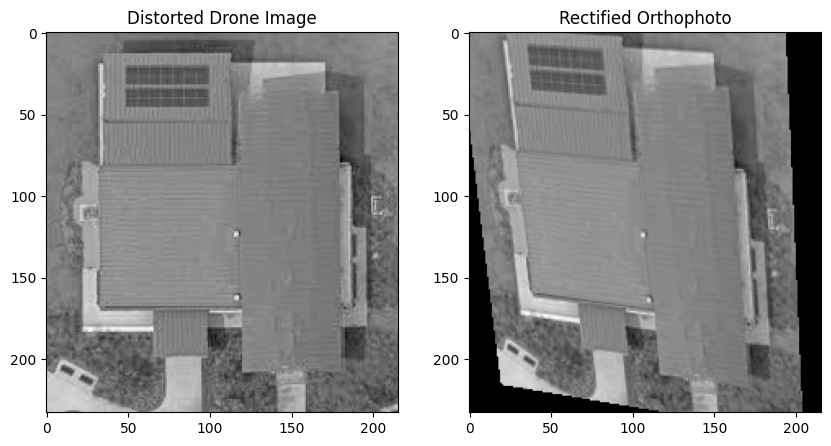

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Function to compute the transformation matrix manually
def compute_transformation_matrix(src_points, dst_points):
    A = []
    for i in range(4):
        x, y = src_points[i][0], src_points[i][1]
        u, v = dst_points[i][0], dst_points[i][1]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
    A = np.array(A)

    B = []
    for i in range(4):
        u, v = dst_points[i]
        B.append(u)
        B.append(v)
    B = np.array(B)

    # Solve the equation A * h = B
    h = np.linalg.solve(A, B)
    return np.append(h, 1).reshape(3, 3)

# Bilinear interpolation function
def bilinear_interpolation(image, x, y):
    x1 = int(np.floor(x))
    y1 = int(np.floor(y))
    x2 = min(x1 + 1, image.shape[1] - 1)
    y2 = min(y1 + 1, image.shape[0] - 1)

    Q11 = image[y1, x1]
    Q21 = image[y1, x2]
    Q12 = image[y2, x1]
    Q22 = image[y2, x2]

    return (Q11 * (x2 - x) * (y2 - y) +
            Q21 * (x - x1) * (y2 - y) +
            Q12 * (x2 - x) * (y - y1) +
            Q22 * (x - x1) * (y - y1))

# Apply transformation matrix and bilinear interpolation
def apply_transformation(image, transform_matrix, output_shape):
    transformed_image = np.zeros(output_shape)
    inverse_matrix = np.linalg.inv(transform_matrix)

    for y in range(output_shape[0]):
        for x in range(output_shape[1]):
            # Find the original coordinates before transformation
            src_coords = np.dot(inverse_matrix, [x, y, 1])
            src_x, src_y = src_coords[0] / src_coords[2], src_coords[1] / src_coords[2]

            if 0 <= src_x < image.shape[1] and 0 <= src_y < image.shape[0]:
                # Apply bilinear interpolation
                transformed_image[y, x] = bilinear_interpolation(image, src_x, src_y)

    return transformed_image

# Load distorted drone image
distorted_image = np.array(Image.open('j2.jpeg').convert('L'))

# Manually selected control points from distorted image and known field coordinates (in pixels)
distorted_points = np.array([[50, 50], [200, 40], [40, 220], [180, 200]], dtype=np.float32)
reference_points = np.array([[40, 40], [180, 40], [50, 210], [170, 210]], dtype=np.float32)

# Compute the transformation matrix
transformation_matrix = compute_transformation_matrix(distorted_points, reference_points)

# Apply the transformation and bilinear interpolation
output_shape = (distorted_image.shape[0], distorted_image.shape[1])
rectified_image = apply_transformation(distorted_image, transformation_matrix, output_shape)

# Visualize the distorted and rectified images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Distorted Drone Image")
plt.imshow(distorted_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Rectified Orthophoto")
plt.imshow(rectified_image, cmap='gray')

plt.show()


#Historical Photo Restoration

Objective:
The goal of this lab task was to rectify and restore old, distorted photographs using bilinear interpolation.

Process:

The scanned old photograph was imported into the image processing software.
Key points on the distorted photograph were manually selected based on visible features like corners or edges.
Corresponding coordinates were obtained by referencing known dimensions or a non-distorted reference image.
A transformation matrix was computed using perspective transformation, mapping the distorted image onto the reference plane.
Bilinear interpolation was used to resample pixel values in the rectified image, smoothing transitions between pixel values and ensuring that the new image is accurate and visually coherent.
The rectified photograph was compared to both the original distorted image and the reference image.
Challenges Faced:

Key Point Selection: Accurate identification of corresponding points on the distorted and reference images was crucial. Any small inaccuracies led to misalignment.
Image Quality: The low resolution or damage in some parts of the old photograph made it difficult to choose ideal points for transformation.
Residual Distortions: Some minor distortions remained, especially in areas where the original image was highly degraded.
Results:
The rectified image showed significant improvement in terms of alignment and appearance. Bilinear interpolation smoothed out pixel transitions, and the overall restoration quality was visually satisfactory. However, there was some residual distortion due to the difficulty of selecting exact key points.

Conclusion:
The application of bilinear interpolation for historical photo restoration proved effective in correcting geometric distortions. While the rectified image closely matched the reference, further refinements (e.g., noise reduction, contrast enhancement) could be applied to enhance the final output.

In [3]:
def distort_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(src_points), np.float32(dst_points))
    rows, cols, _ = image.shape
    distorted_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return distorted_image
def rectify_image(image, src_points, dst_points):
    transformation_matrix = cv2.getAffineTransform(np.float32(dst_points), np.float32(src_points))
    rows, cols, _ = image.shape
    rectified_image = cv2.warpAffine(image, transformation_matrix, (cols, rows), flags=cv2.INTER_LINEAR)
    return rectified_image
def display_images(original, distorted, rectified, task_name):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title(f'Original {task_name}')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(distorted, cv2.COLOR_BGR2RGB))
    plt.title(f'Distorted {task_name}')

    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(rectified, cv2.COLOR_BGR2RGB))
    plt.title(f'Rectified {task_name}')
    plt.show()

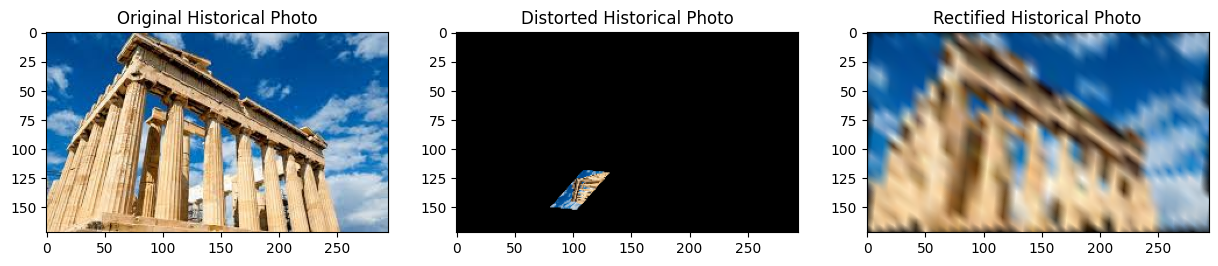

In [4]:
image = cv2.imread('historial.jpeg')

src_points = np.array([(14, 17), (13, 768), (935, 760)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_photo = distort_image(image, src_points, dst_points_distort)
rectified_photo = rectify_image(distorted_photo, src_points, dst_points_distort)

display_images(image, distorted_photo, rectified_photo, 'Historical Photo')

#Architectural Image Rectification Report

Objective:
The objective of this task was to correct perspective distortions in architectural images using bilinear interpolation.

Process:

The distorted architectural image was imported into image processing software.
Key points corresponding to known dimensions of the building were manually selected. These points were chosen from distinct features such as corners and edges of the building.
The corresponding coordinates were defined based on the true dimensions of the building.
A transformation matrix was calculated to align the distorted image with the known dimensions, ensuring the correct perspective.
Bilinear interpolation was used to resample pixel values in the rectified image, ensuring a smooth and accurate output.
The original and rectified images were compared to assess the effectiveness of the correction.
Challenges Faced:

The selection of key points was crucial, and any inaccuracies led to minor misalignments.
Severe perspective distortions required careful adjustment of the transformation matrix to ensure accurate rectification.
Results: The rectified architectural image showed a significant improvement in perspective alignment. Bilinear interpolation ensured smooth transitions in pixel values, producing a visually coherent rectification.

Conclusion: The process of rectifying architectural images using bilinear interpolation was successful. However, further refinements could be made to improve precision in key point selection for better results.

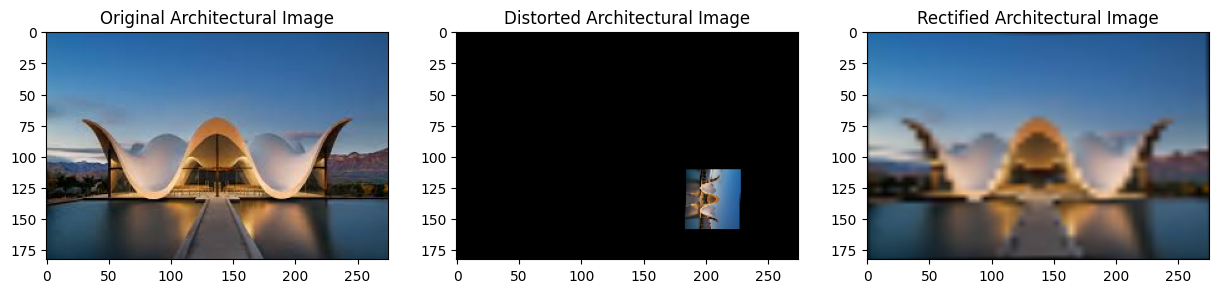

In [5]:
image = cv2.imread('archi.jpeg')

src_points = np.array([(59, 494), (111, 75), (690, 441)])

dst_points_distort = np.array([[110, 120], [210, 130], [120, 230]])

distorted_architectural = distort_image(image, src_points, dst_points_distort)
rectified_architectural = rectify_image(distorted_architectural, src_points, dst_points_distort)

display_images(image, distorted_architectural, rectified_architectural, 'Architectural Image')